- Augusto Luchesi Matos, RA: 740871
- Carlos Eduardo Nascimento dos Santos, RA: 791029
- Gabriel Meirelles Carvalho Orlando, RA: 790728

database - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

##Complexo:
Possui 12 atributos com diferente tipos de dados, sendo 5 Nominais, 3 Discretos e 2 Continuos e 1 desses atributos possui valores nulos, essa variedade de dados nos atributos representa uma complexidade na ánalise e maior cuidado no tratamento de dados antes de aplicar o classificador.

##Desafiador:
O Dataset faz referencia a uma área que não dominamos e sua complexidade de atributos traz um desafio para o grupo, pois nos força a utilizar diversas técnicas e aprofundar nosso conhecimento na matéria.

# Introdução



O AVC ou Acidente Vascular Cerebral é o entupimento dos vasos que levam sangue ao cérebro, e provoca a paralisia da região afetada no cérebro.

Segundo dados do Ministério da Saúde de 2018, a cada 5 minutos um brasileiro vem a óbito
em decorrência do AVC. O que resulta em aproximadamente 100 mil mortes por ano.
Também segundos dados do Ministério da Saúde o AVC é a segunda principal causa de mortes no Brasil, atrás apenas do infarto.

Esta doença, normalmente, tem como alvo pessoas mais idosas, entretanto no período entre 2019 e 2021 houve um crescimento de 3% no número de óbitos em decorrência do AVC, na faixa etária de 20 à 59 anos, segundo a Central Nacional de Informações do Registro Civil (CRC Nacional).

É possível identificar sinais, que possam sugerir a ocorrência de um AVC, 
entre eles estão a fraqueza, formigamento na face, alteração na fala, etc... Esse acidente pode ser evitado, caso seja feito um acompanhamento médico
que evite a ocorrencia do próprio. Segundo o Ministério da Saúde,  em 90% dos casos, o AVC, pode ser evitado com a prevenção.
Assim é importante classificar pacientes de acordo com seus hábitos se estes
são ou não propícios a terem um AVC.



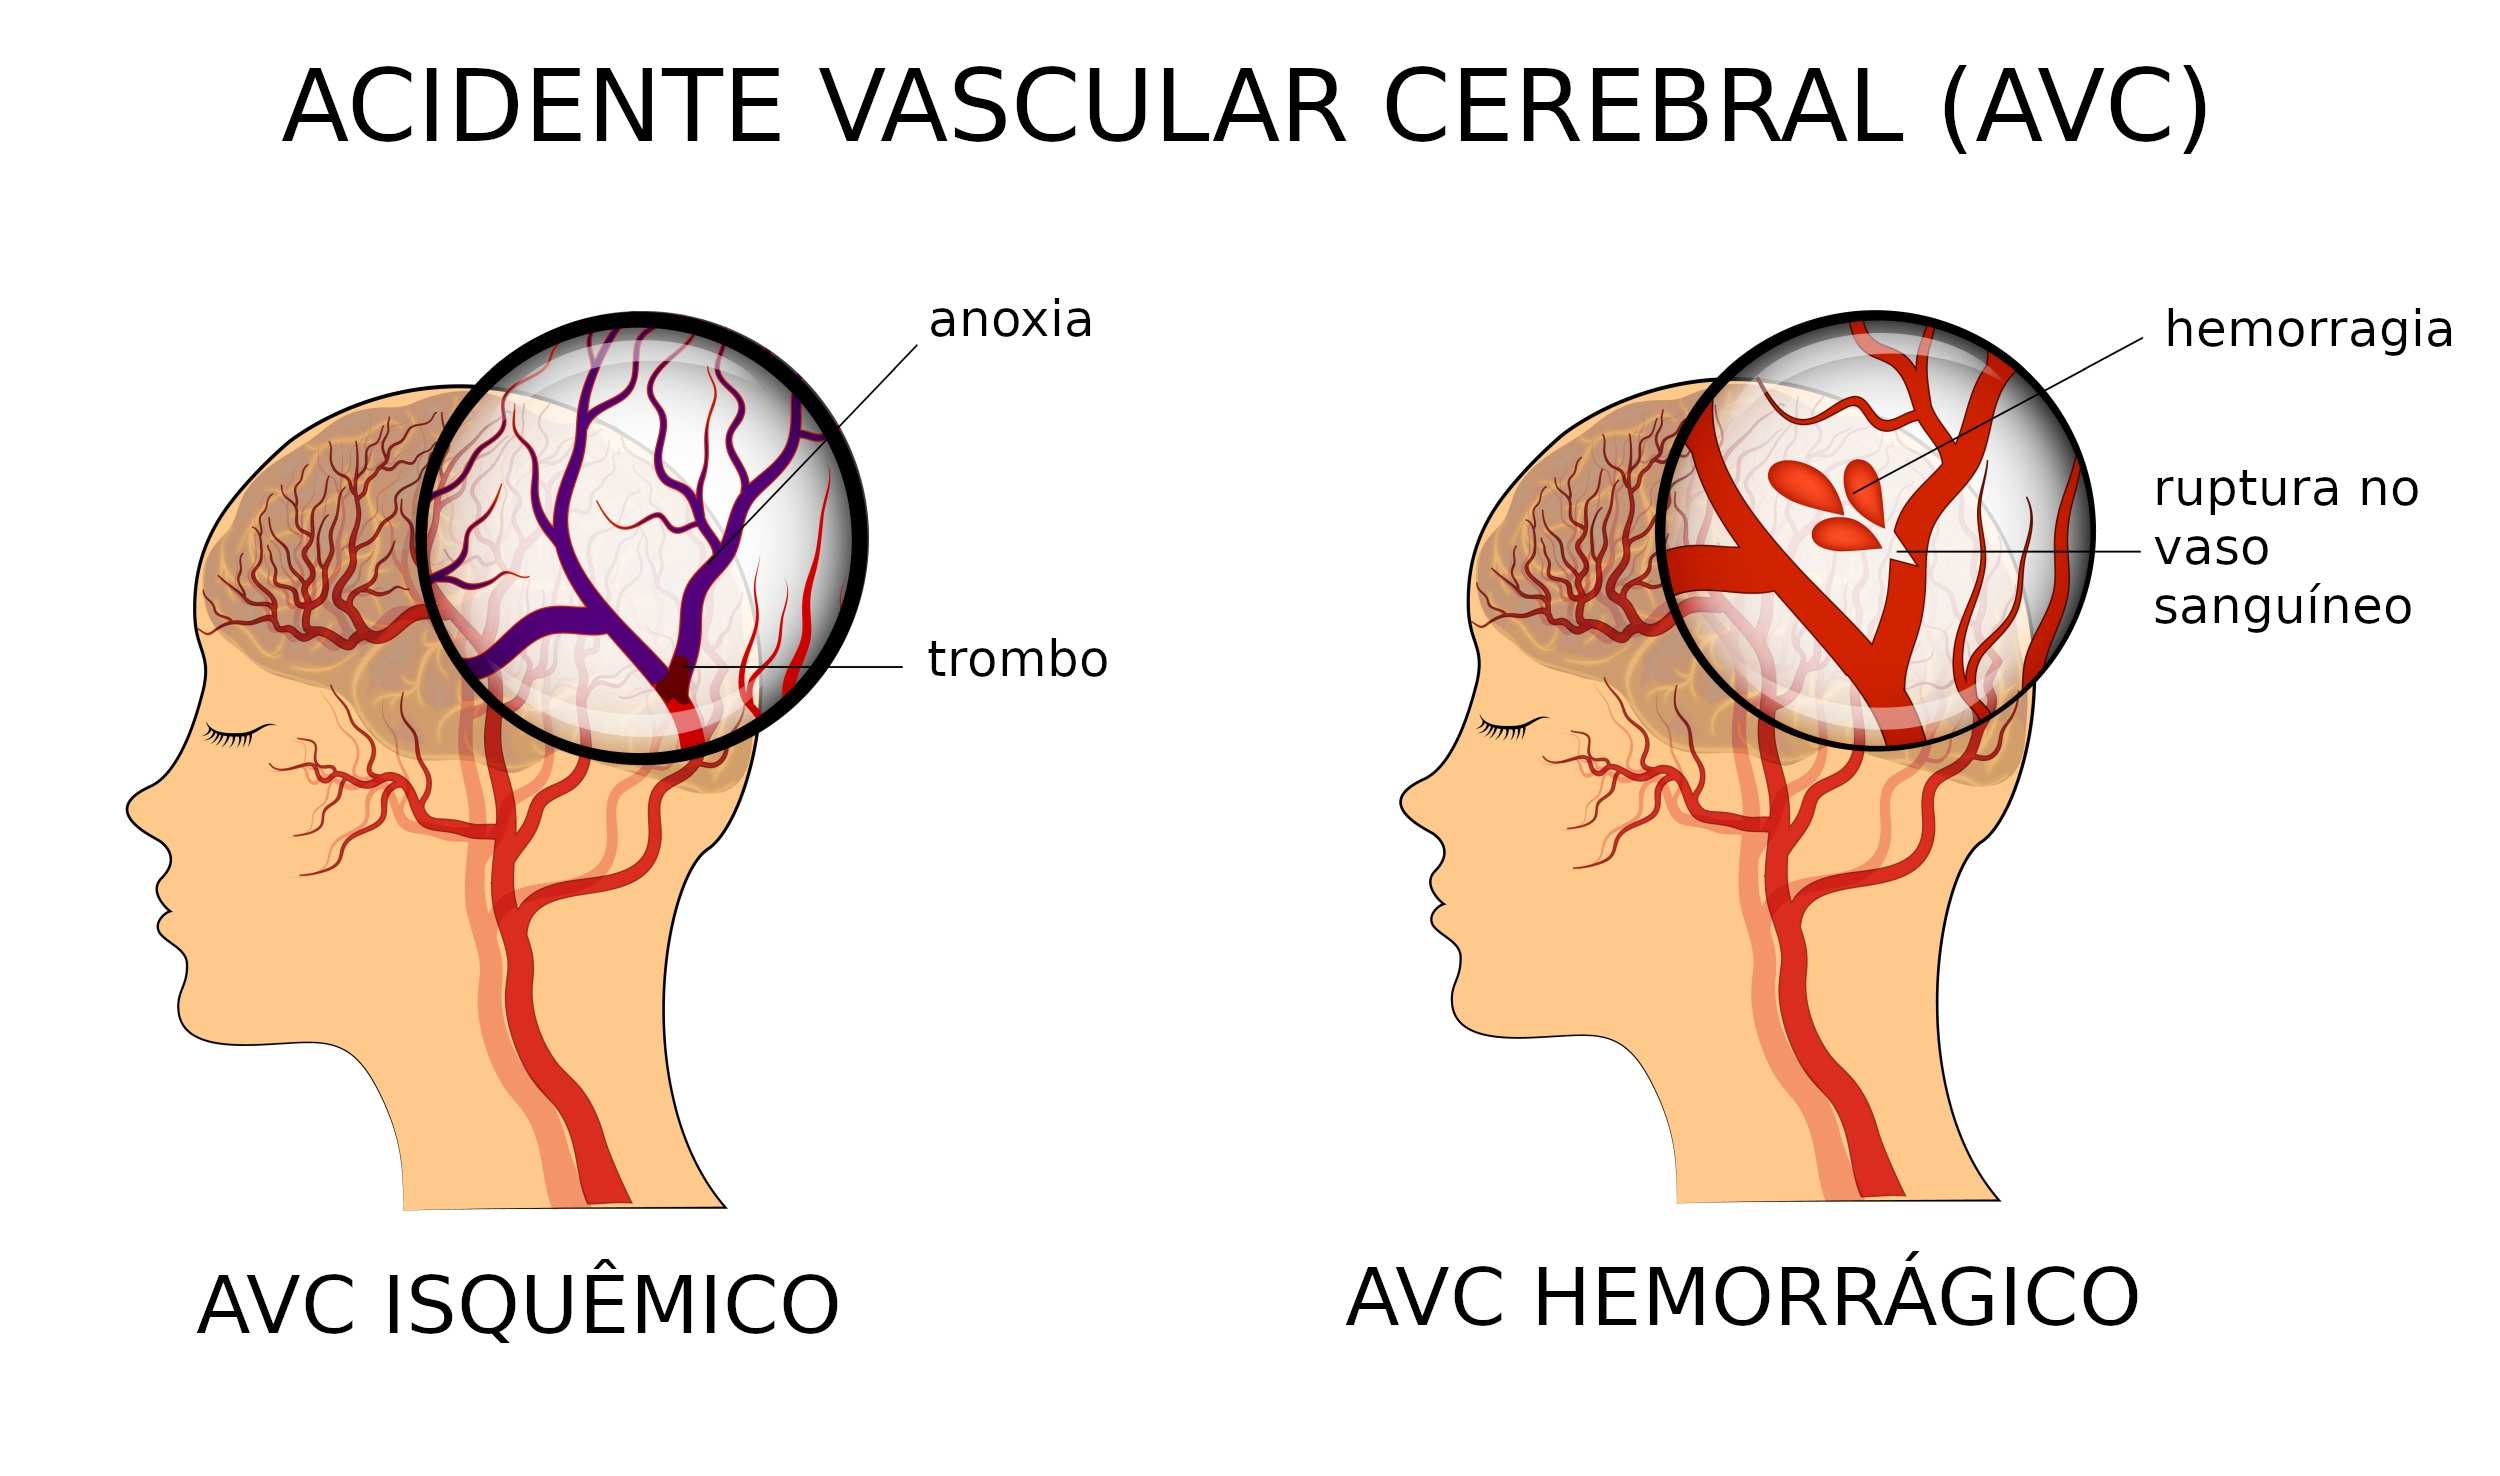

Links:

https://noticias.r7.com/saude/proporcao-de-jovens-que-morrem-de-avc-no-brasil-aumenta-em-2021-29102021

https://saude.abril.com.br/medicina/11-coisas-que-voce-nao-sabe-sobre-o-avc/

https://edicaodobrasil.com.br/2022/03/18/90-dos-casos-de-avc-podem-ser-evitados-com-prevencao/#:~:text=Minist%C3%A9rio%20da%20Sa%C3%BAde.-,Estudos%20indicam%20que%20uma%20em%20cada%20quatro%20pessoas%20ter%C3%A1%20a,risco%20de%20desenvolver%20a%20patologia.

# Download dataset

In [1]:
from google.colab import files

In [2]:
files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (7).csv


{'healthcare-dataset-stroke-data.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\n9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1\n51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1\n31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1\n60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1\n1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1\n56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1\n53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1\n10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1\n27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1\n60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1\n12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1\n12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1\n12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1\n8213,Mal

# Importando o dataset


O dataset foi lido utilizando a função do pandas **read_csv** e foi armazenada da variável **df**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')


# Informações sobre o conjunto de dados

Exibição de algumas instâncias do conjunto de dados, para que os atributos possam ser exibidos

In [5]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Tamanho do conjunto de dados. Temos 5110 instâncias e 12 atributos.


In [6]:
df.shape

(5110, 12)

Uma breve descrição de cada atributo do conjunto de dados, exibindo algumas métricas para seus valores. Nota-se que apenas atributos numéricos ou binários são inclusos nessa descrição.

Um fato importante de se notar é que **count**, mostra quantos valores não nulos tem-se para aquele atributo. Logo é possível notar que neste conjunto de dados, existem valores nulos para alguns atributos.

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Análise Inicial do Dataset

Como já constatado, o conjunto de dados possui 12 atributos, entretanto 1 deles é o **id**, que não servirá como um atributo preditivo. Além disso no conjunto também há o rótulo da instância. Assim, possui-se 10 atributos preditivos e uma classe. Esta classe é binária, que define em 0 ou 1 se a pessoa já teve um  AVC, para que o modelo criado seja capaz de prever a possibilidade de AVCs com base nos atributos do paciente.

Como dito, restam 10 atributos relevantes para o classificador que estão dispersos da seguinte maneira:
- 3 Categóricos Nominal
- 4 Numéricos binários
- 3 Numéricos Continuos

Exibição dos atributos categóricos do conjunto de dados

In [8]:
def check_binary(df):
  colunas = df.columns
  binario = []
  for col in colunas:
    if len(pd.unique(df[col])) == 2 and col != "stroke":
      binario.append(col)
  return binario


In [9]:
def remove_equal(lista1,lista2):
  remover = []
  for valor in lista1:
    for valor2 in lista2:
      if valor == valor2:
        remover.append(valor)
  for i in range(len(remover)):
    lista1.remove(remover[i])
  if 'stroke' in lista1:
    lista1.remove('stroke')
  if 'id' in lista1:
    lista1.remove('id')


In [10]:
def show_labels(df,lista):
  for col in lista:
    print(f"Coluna {col} possui os seguintes valores: {pd.unique(df[col])}, no total: {df[col].nunique()} valores\n\n")

In [11]:
def show_labels_numeric(df,lista):
  for col in lista:
    print(f"Coluna {col} é númerica contínua, e possui no total: {df[col].nunique()} valores distintos\n\n")

In [12]:
num_cols = df._get_numeric_data().columns.to_list()

In [13]:
columns = df.columns.to_list()
categorical_cols = set(columns).difference(set(num_cols))

In [14]:
binary = check_binary(df)

In [15]:
remove_equal(num_cols,binary)
remove_equal(categorical_cols,binary)

Valores categóricos nominais

In [16]:
show_labels(df,categorical_cols)

Coluna work_type possui os seguintes valores: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'], no total: 5 valores


Coluna smoking_status possui os seguintes valores: ['formerly smoked' 'never smoked' 'smokes' 'Unknown'], no total: 4 valores


Coluna gender possui os seguintes valores: ['Male' 'Female' 'Other'], no total: 3 valores




Valores numéricos binários

In [17]:
show_labels(df,binary)

Coluna hypertension possui os seguintes valores: [0 1], no total: 2 valores


Coluna heart_disease possui os seguintes valores: [1 0], no total: 2 valores


Coluna ever_married possui os seguintes valores: ['Yes' 'No'], no total: 2 valores


Coluna Residence_type possui os seguintes valores: ['Urban' 'Rural'], no total: 2 valores




Valores númericos contínuos

In [18]:
show_labels_numeric(df,num_cols)

Coluna age é númerica contínua, e possui no total: 104 valores distintos


Coluna avg_glucose_level é númerica contínua, e possui no total: 3979 valores distintos


Coluna bmi é númerica contínua, e possui no total: 418 valores distintos




## Balanceamento do conjunto de dados

- O conjunto de dados escolhido, é bastante desigual. Ou seja, a classe 0 é muito mais frequente do que a classe 1 e essa discrepância gerou alguns erros na hora da classificação.
- Para isso foi utilizado a técnica de rejeitar algumas instâncias da classe 0, para que o conjunto de dados ficasse mais balanceado.
- Como se pode ver, no conjunto de dados antes do balanceamento, 95% das instâncias eram da classe 0, enquanto apenas 4,8% eram da classe 1.


In [19]:
(df['stroke'] == 0).sum()/df.shape[0]

0.9512720156555773

In [20]:
(df['stroke'] == 1).sum()/df.shape[0]

0.0487279843444227

In [21]:
df.shape

(5110, 12)

# Tratamento dos Atributos Categóricos:




Como pode ser observado , fizemos uma ánalise da quantidade de valores possíveis para cada atributo e para podermos utilzar o KNN, que não lida com valores catégoricos, decidimos optar pelas seguintes soluções:
- Para lidar com os atributos categóricos será utilizada a técnica **One Hot Encoding** para a conversão dos dados

## One-Hot-Encoding

- O processo de One-Hot-Encoding consiste em transformar todos os valores do atributo em atributos do conjunto de dados. Ou seja, se um atributo possui 3 valores serão criados 3 novos atributos, e o atributo original será removido. Estes novos atributos serão binários, e indicarão a presença ou não do valor para aquela instância.

**Link:** [One-Hot-Encoding](https://arthurlambletvaz.medium.com/one-hot-encoding-o-que-%C3%A9-cd2e8d302ae0)

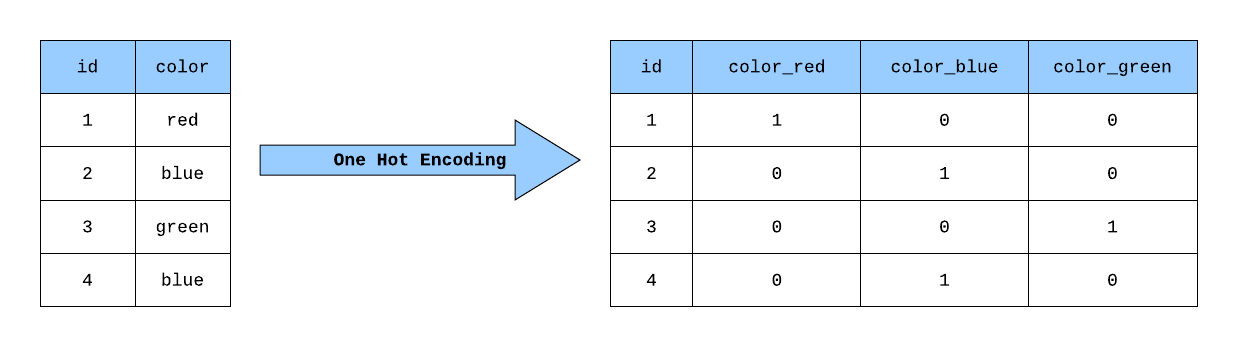

Referência: [Imagem_acima](https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39)

# <h1>Abaixo iremos realizar o tratamento dos atributos preditivos<h1>

# ID


- O atributo **"id"** é o dentificador de cada instância.

- Este atributo é numérico discreto. 

- Como é uma chave aleátoria que, para a classificação, não exibe nenhuma relevância, será retirado do conjunto de dados.

In [22]:
display(df['id'])

0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

In [23]:
df = df.drop(['id'],axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Gender

- O atributo "**gender**" diz respeito ao gênero da pessoa. 

- Este atributo, é categórico nominal 

- Possui 3 valores possíveis, porém, o valor **"Other"** ocorre em apenas uma instância.

- Então, como uma instância não acarreta em mudanças significativas no modelo, será utilizada a técnica de exclusão, e assim este exemplo será desconsiderado. 

- Logo, este atributo, após a modificação é numérico binário. 

- Consequentemente, serão considerandos apenas **"Male"** e **"Female"** que , nesse caso, serão transformados para binário em **1** para **"Male"** e **0** para **"Female"**.

In [24]:
pd.unique(df['gender'])

array(['Male', 'Female', 'Other'], dtype=object)

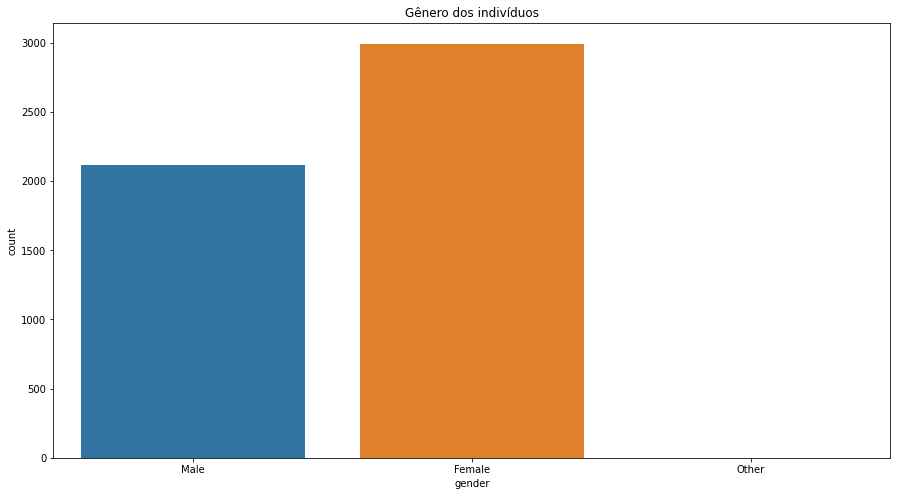

In [25]:
plt.figure(figsize=(15, 8))
plt.title("Gênero dos indivíduos")
fig = sns.countplot(x = 'gender', data =df)

In [26]:
indice_other =df.loc[df['gender'] == 'Other'].index[0]

In [27]:
df = df.drop(df.index[indice_other])

In [28]:
pd.unique(df['gender'])

array(['Male', 'Female'], dtype=object)

In [29]:
dummy_features = pd.get_dummies(df['gender'], drop_first = True)
df = df.drop(['gender'],axis=1)
df.insert(0,'gender',dummy_features)


In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Hypertension

- O atributo **"hypertension"** indica a presença de Hipertensão.

- Este atributo é binário 

- O valor **0** significa que a pessoa não é hipertensa e **1** que a pessoa é hipertensa.

In [31]:
pd.unique(df['hypertension'])

array([0, 1])

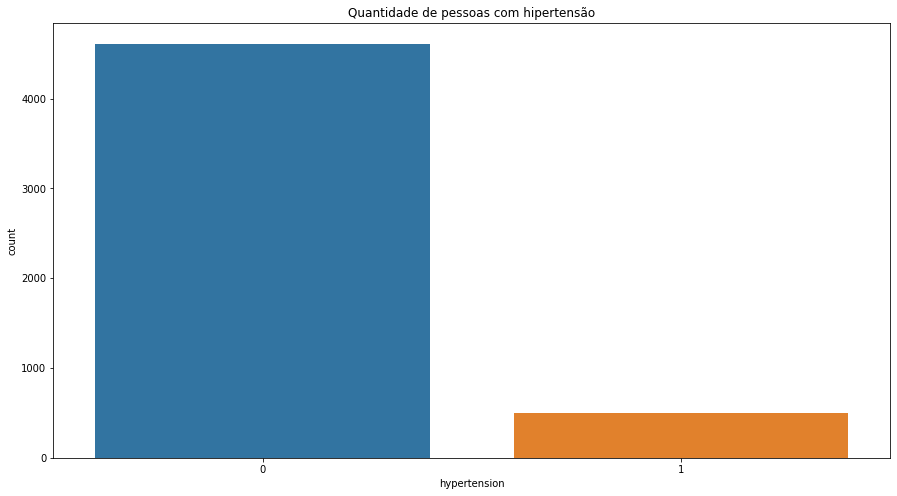

In [32]:
plt.figure(figsize=(15, 8))
plt.title("Quantidade de pessoas com hipertensão")
fig = sns.countplot(x = 'hypertension', data =df)

#Heart Disease

- O atributo **"heart_disease"** indica a presença de problemas cardíacoes. 

- Este atributo é binário 

- O valor **0** significa que a pessoa não possui doença cardíaca e **1** indica que a pessoa é cardíaca.

In [33]:
pd.unique(df['heart_disease'])

array([1, 0])

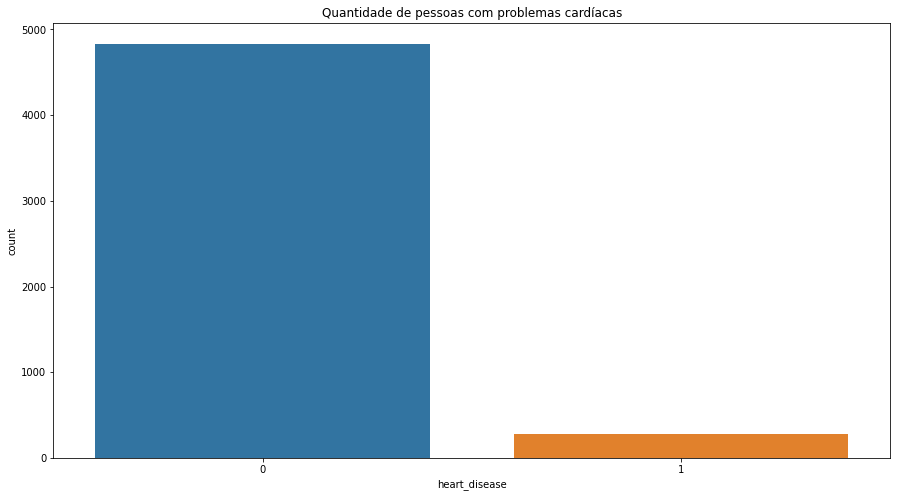

In [34]:
plt.figure(figsize=(15, 8))
plt.title("Quantidade de pessoas com problemas cardíacas")
fig = sns.countplot(x = 'heart_disease', data =df)

# Ever Married

- O atributo **"ever_married"** indica se o indivíduo já foi casado. 

- Este atributo é binário. 
- Entretanto, no conjunto de dados os valores estão em forma de string, que, caso fossem utilizados no **KNN**, resultaria em erro.
- Dessa forma, o valor **"No"**, que indica que a pessoa nunca se casou, foi modificado para o valor **"0"** e o valor **"Yes"**, que indica que a pessoa já se casou, foi modificado para **"1"**.

In [35]:
pd.unique(df['ever_married'])

array(['Yes', 'No'], dtype=object)

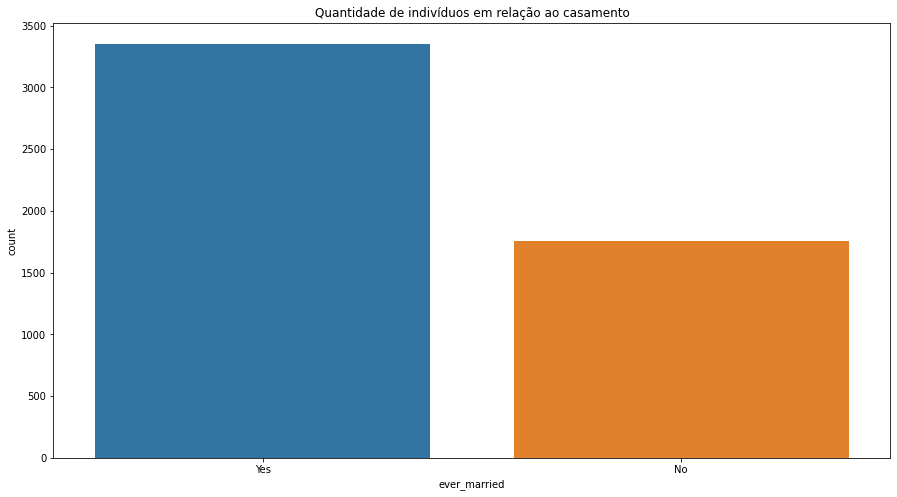

In [36]:
plt.figure(figsize=(15, 8))
plt.title("Quantidade de indivíduos em relação ao casamento")
fig = sns.countplot(x = 'ever_married', data =df)

In [37]:
colunas = df.columns
indice_married = 0
for i in range(len(colunas)):
    if colunas[i] == 'ever_married':
      indice_married = i

In [38]:
dummy_features = pd.get_dummies(df['ever_married'], drop_first = True)
df = df.drop(['ever_married'],axis=1)
df.insert(indice_married,'ever_married',dummy_features)

In [39]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


# Work Type

 - O atributo **"work_type"** diz respeito ao tipo de trabalho do indivíduo.
 
 -  Este atributo é categórico nominal. 
 
 - Possui 5 valores distintos: **"children", "Govt_job", "Never_worked", "Private"** e **"Self-employed".**

 - Para lidar com este atributo, foi realizado o processo de One-Hot-Enconding.
 


In [40]:
pd.unique(df['work_type'])

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

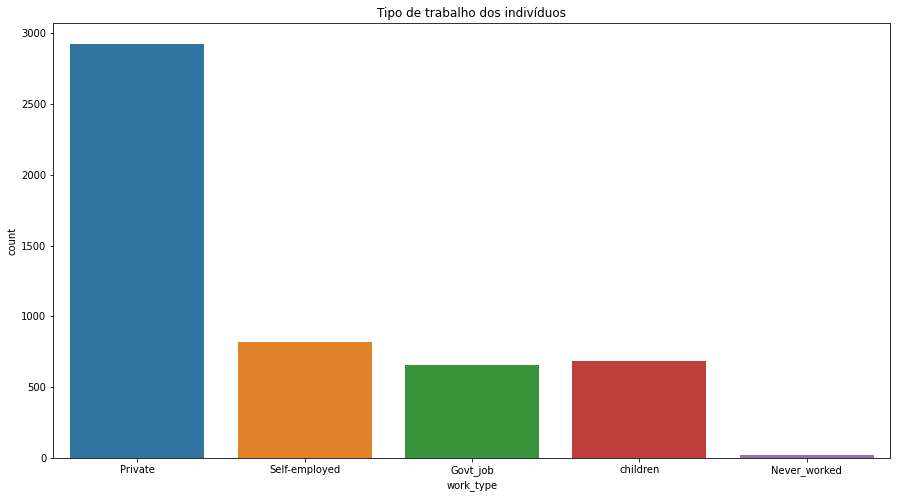

In [41]:
plt.figure(figsize=(15, 8))
plt.title("Tipo de trabalho dos indivíduos")
fig = sns.countplot(x = 'work_type', data =df)

In [42]:
y = pd.get_dummies(df['work_type'])

In [43]:
colunas = df.columns
indice_work = 0
for i in range(len(colunas)):
    if colunas[i] == 'work_type':
      indice_work = i

In [44]:
lista_nomes = pd.unique(df['work_type'])

In [45]:
df = df.drop(['work_type'],axis=1)

In [46]:
for i in range(len(lista_nomes)): 
  df.insert(indice_work,lista_nomes[i],y[lista_nomes[i]])
  indice_work += 1

In [47]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Private,Self-employed,Govt_job,children,Never_worked,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,0,0,0,0,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,0,1,0,0,0,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,1,0,0,0,0,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,1,0,0,0,0,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,0,1,0,0,0,Rural,174.12,24.0,never smoked,1


# Residence Type

- O atributo **"Residence_type"** indica o local de residência de indivíduo. 
- Este atributo é binário. 
- Entretanto, no conjunto de dados os valores estão em forma de string, que, caso fossem utilizados no **KNN**, resultaria em erro.
- Dessa forma, o valor **"Rural"**, que indica que a pessoa mora na área rural, foi modificado para o valor **"0"** e o valor **"Urban"**, que indica que a pessoa mora na área urbana, foi modificado para **"1"**.

In [48]:
pd.unique(df['Residence_type'])

array(['Urban', 'Rural'], dtype=object)

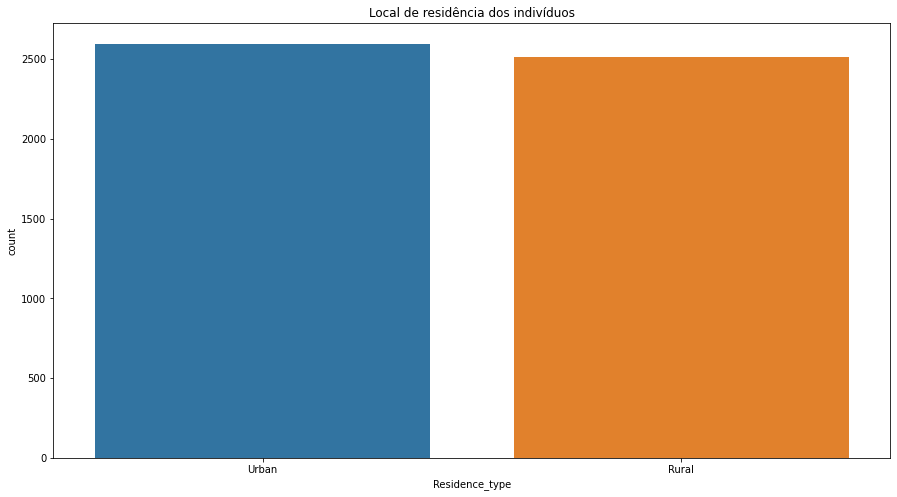

In [49]:
plt.figure(figsize=(15, 8))
plt.title("Local de residência dos indivíduos")
fig = sns.countplot(x = 'Residence_type', data =df)

In [50]:
colunas = df.columns
indice_residence = 0
for i in range(len(colunas)):
    if colunas[i] == 'Residence_type':
      indice_residence = i

In [51]:
dummy_features = pd.get_dummies(df['Residence_type'], drop_first = True)
df = df.drop(['Residence_type'],axis=1)
df.insert(indice_residence,'residence_type',dummy_features)

In [52]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Private,Self-employed,Govt_job,children,Never_worked,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,0,0,0,0,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,0,1,0,0,0,0,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,1,0,0,0,0,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,1,0,0,0,0,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,0,1,0,0,0,0,174.12,24.0,never smoked,1


# Smoking Status

- O atributo  **"smoking_status"** representa a relação de um indivíduo com o uso de cigarro.

- Este atributo é catégorico nominal.

- Possui 4 valores distintos, que são: **"formerly_smoked", "never_smoked", "smokes", "Unknown"**. 

- Nota-se que há a presença do valor **"Unkown"**, que representa a ausência da informação. 

- Esse valor está presente em 1544 instâncias do data set, o que representa 30% das instâncias.

- Dessa forma, não é uma boa ideia eliminar estas instâncias, como o que foi feito no atributo **"gender"**, mas sim tratá-los como valores efetivos para o classificador, assim o valor **"Unknown"** será usado como um estado de fumante, para que estes possam ser utilizados de forma correta.

In [53]:
pd.unique(df['smoking_status'])

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [54]:
tamanho, _ =df.loc[df['smoking_status'] == 'Unknown'].shape

In [55]:
print(f"{((tamanho / df.shape[0]) * 100):.2f}% dos valores em smoking_status são 'Unknown'")

30.22% dos valores em smoking_status são 'Unknown'


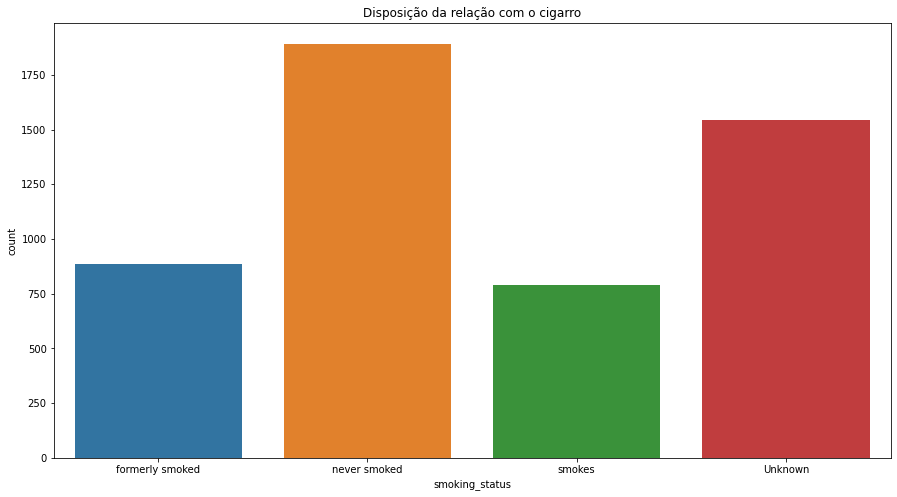

In [56]:
plt.figure(figsize=(15, 8))
plt.title("Disposição da relação com o cigarro")
fig = sns.countplot(x = 'smoking_status', data =df)

In [57]:
y = pd.get_dummies(df['smoking_status'])

In [58]:
colunas = df.columns
indice_smoking = 0
for i in range(len(colunas)):
    if colunas[i] == 'smoking_status':
      indice_smoking = i

In [59]:
lista_nomes = pd.unique(df['smoking_status'])

In [60]:
df = df.drop(['smoking_status'],axis=1)

In [61]:
for i in range(len(lista_nomes)): 
  df.insert(indice_smoking,lista_nomes[i],y[lista_nomes[i]])
  indice_smoking += 1

In [62]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Private,Self-employed,Govt_job,children,Never_worked,residence_type,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,Unknown,stroke
0,1,67.0,0,1,1,1,0,0,0,0,1,228.69,36.6,1,0,0,0,1
1,0,61.0,0,0,1,0,1,0,0,0,0,202.21,NaN,0,1,0,0,1
2,1,80.0,0,1,1,1,0,0,0,0,0,105.92,32.5,0,1,0,0,1
3,0,49.0,0,0,1,1,0,0,0,0,1,171.23,34.4,0,0,1,0,1
4,0,79.0,1,0,1,0,1,0,0,0,0,174.12,24.0,0,1,0,0,1


#Body Mass Index (BMI)

- O atributo **"bmi"** diz respeito ao índice de massa corporal da pessoa.

- Este atributo é numérico contínuo.
 
- Possui 4% de valores nulos, que serão retirados do dataframe, já que 4% não é uma quantidade significativa, visto que o conjunto de dados não é muito volumoso.

In [63]:
valores_nulos = df['bmi'].isnull().sum()

In [64]:
print(f"{((valores_nulos / df.shape[0]) * 100):.2f}% dos valores em smoking_status são NULOS")

3.93% dos valores em smoking_status são NULOS


In [65]:
df = df.dropna()

In [66]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Private              0
Self-employed        0
Govt_job             0
children             0
Never_worked         0
residence_type       0
avg_glucose_level    0
bmi                  0
formerly smoked      0
never smoked         0
smokes               0
Unknown              0
stroke               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


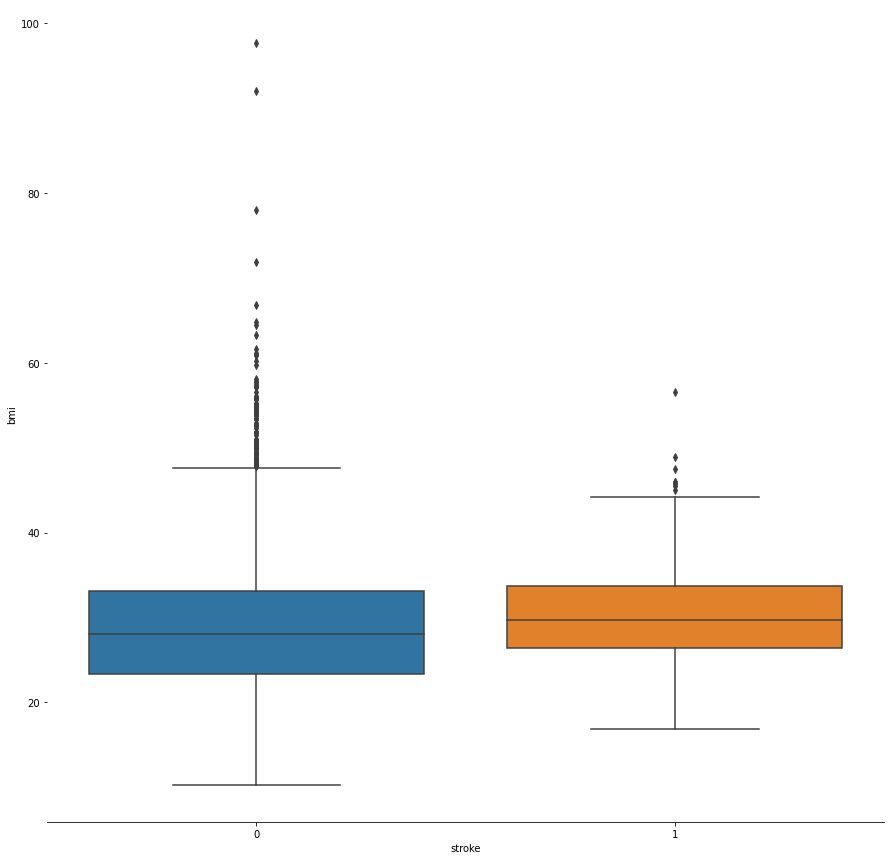

In [67]:
f, axes = plt.subplots(figsize=(15, 15), sharex=False)
sns.despine(left=True)
sns.boxplot('stroke', 'bmi', data = df, ax=axes)

# Balanceando o conjunto

In [68]:
tamanho = df.shape[0]

In [69]:
i = 0
w = 0
while i < 4100:
  if df.iloc[w]['stroke'] == 0:
    i += 1
    df = df.drop(df.index[w])
    df = df.set_index(pd.Index(range(0,tamanho-i)))

  else:
    w += 1

#Age


- O atributo age representa a idade do indivíduo.

- Este atributo é numérico continuo.

- Possui valores entre 0.08 e 82

In [70]:
df['age'].min()

0.32

In [71]:
df['age'].max()

82.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


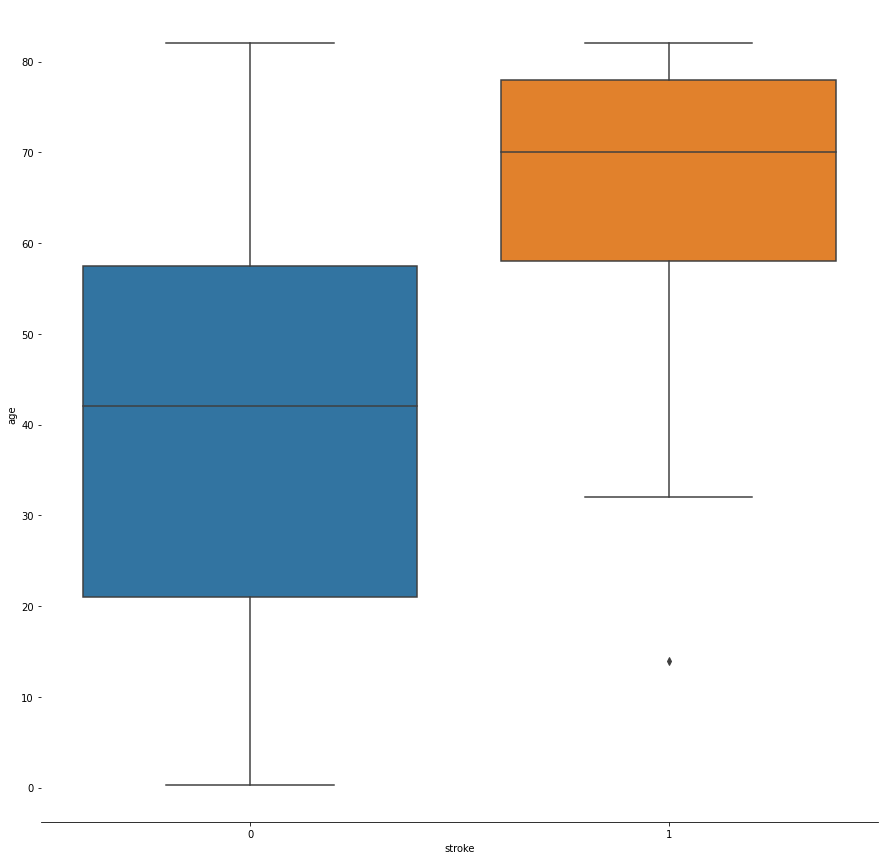

In [72]:
f, axes = plt.subplots(figsize=(15, 15), sharex=False)
sns.despine(left=True)
sns.boxplot('stroke', 'age', data = df, ax=axes)

#Average Glucose Level

- O atributo avg_glucose diz respeito ao nível médio de glicose no sangue da pessoa.

- Este atributo é numérico contínuo.

- Possui valores entre 55.12 e 271.74.

In [73]:
df['avg_glucose_level'].min()

55.12

In [74]:
df['avg_glucose_level'].max()

271.74

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


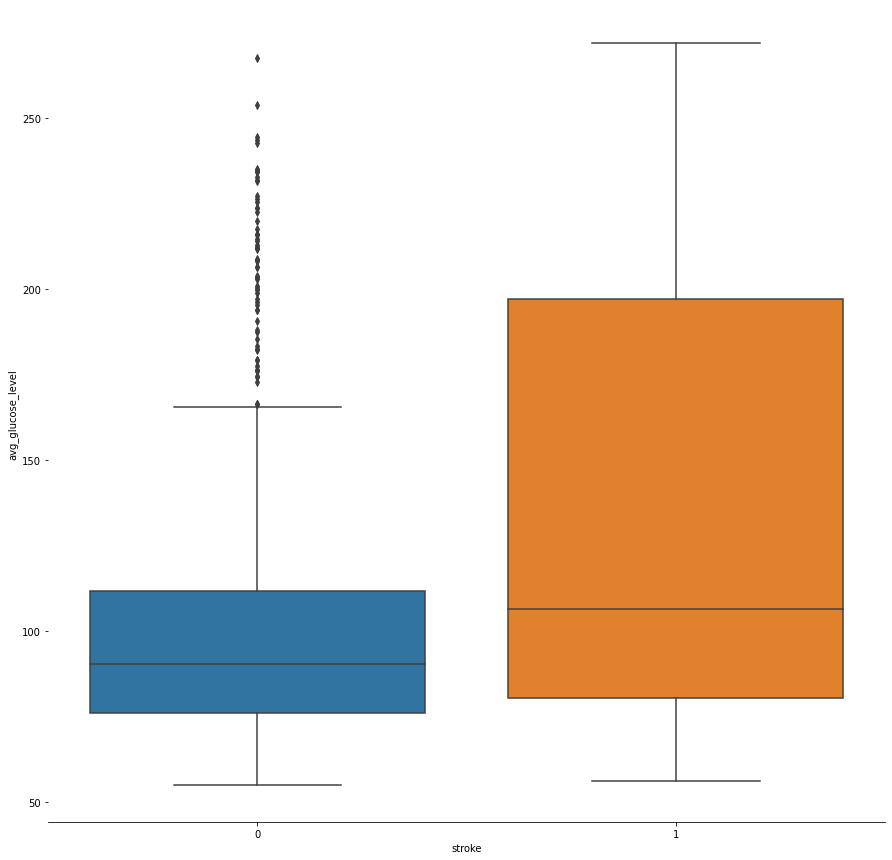

In [75]:
f, axes = plt.subplots(figsize=(15, 15), sharex=False)
sns.despine(left=True)
sns.boxplot('stroke', 'avg_glucose_level', data = df, ax=axes)

# Stroke

- Este atributo é o rótulo da instância. Ou seja, é o atributo que se deseja predizer com a construção do modelo de aprendizado de máquina.
- Como já dito, este atributo é binário, e indica se o indivíduo já teve um AVC

In [76]:
pd.unique(df['stroke'])

array([1, 0])

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [78]:
df.groupby('stroke').count()

,gender,age,hypertension,heart_disease,ever_married,Private,Self-employed,Govt_job,children,Never_worked,residence_type,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,Unknown
stroke,,,,,,,,,,,,,,,,,
0,599,599,599,599,599,599,599,599,599,599,599,599,599,599,599,599,599
1,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209


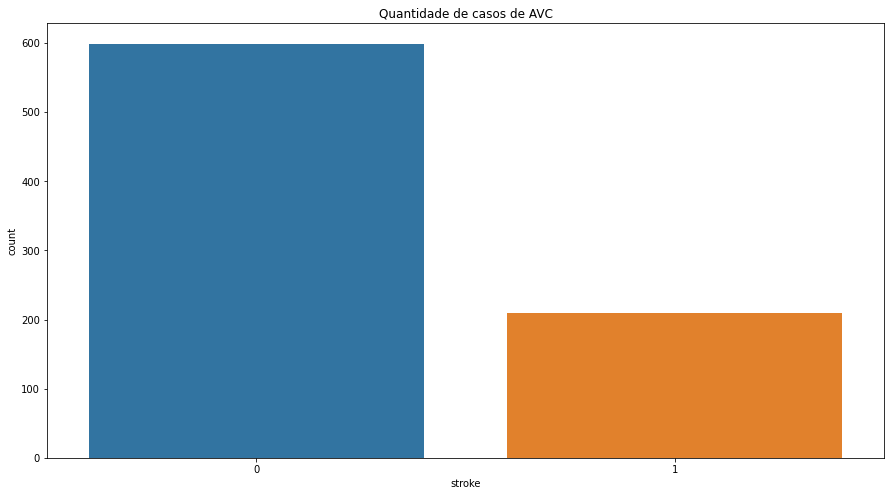

In [79]:
plt.figure(figsize=(15, 8))
plt.title("Quantidade de casos de AVC")
fig = sns.countplot(x = 'stroke', data =df)

# Describe Data frame

In [80]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Private,Self-employed,Govt_job,children,Never_worked,residence_type,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,Unknown,stroke
0,1,67.0,0,1,1,1,0,0,0,0,1,228.69,36.6,1,0,0,0,1
1,1,80.0,0,1,1,1,0,0,0,0,0,105.92,32.5,0,1,0,0,1
2,0,49.0,0,0,1,1,0,0,0,0,1,171.23,34.4,0,0,1,0,1
3,0,79.0,1,0,1,0,1,0,0,0,0,174.12,24.0,0,1,0,0,1
4,1,81.0,0,0,1,1,0,0,0,0,1,186.21,29.0,1,0,0,0,1


In [81]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,Private,Self-employed,Govt_job,children,Never_worked,residence_type,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,Unknown,stroke
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,0.403465,47.650050,0.122525,0.065594,0.689356,0.574257,0.170792,0.138614,0.112624,0.003713,0.529703,111.257438,29.154332,0.199257,0.397277,0.147277,0.256188,0.258663
std,0.490896,23.486552,0.328094,0.247725,0.463044,0.494761,0.376560,0.345757,0.316328,0.060858,0.499426,50.297280,7.318313,0.399689,0.489637,0.354602,0.436797,0.438171
min,0.000000,0.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,13.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.085000,24.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,51.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,93.765000,28.400000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,121.290000,33.225000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,271.740000,60.900000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y = df['stroke']
atributos_preditivos_dt = df.drop(['stroke'],axis=1)

# Normalização dos dados

Agora, a partir desse bloco, realizaremos a normalização dos dados com o intuito de encontrar uma escala em comum para os dados, aproximando os valores.

Importamos as funções do sklearn para realizar a cross validation

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [84]:
ap_normalized = StandardScaler().fit_transform(atributos_preditivos_dt)


# Função para plotar graficos

In [85]:
def plot_graph(x,y,str1,str2,titulo):
  plt.figure(figsize=(7,6))
  plt.plot(x, y, color='black',linewidth=2,marker='o',markerfacecolor='blue',markersize=8)
  plt.title(titulo, fontsize=15)
  plt.xlabel(str1, fontsize = 15)
  plt.ylabel(str2, fontsize = 15)
  plt.show(True)

# KNN

- O algoritmo de classificação utilizado foi o KNN

- Este algoritmo faz a classificação das novas instâncias com base na distância entre seus atributos.

- O KNN calcula os k vizinhos mais próximos de uma instância, com base em seus atributos, e com estes vizinhos descobre a classe que o exemplo pertence.

- Como mostra a imagem abaixo:

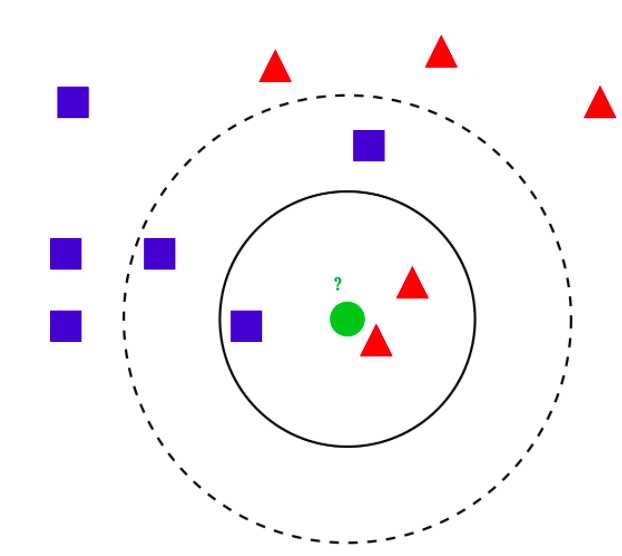

Referência: [KNN_Image](https://scikit-learn.org/stable/modules/cross_validation.html)

- Nesta imagem podemos observar várias coisas interessantes:
  - O funcionamento do algoritmo, que leva em conta a classe dos k exemplos mais próximos à nova instância, utiliza a contagem das classes para definir a classe do novo exemplo. Ou seja, se o número k é igual a 3, e à um ponto verde existem 2 pontos da classe vermelha e 1 ponto da classe azul, então o algoritmo irá classificar o novo ponto como pertencente à classe vermelha.
  - Além disso, pode-se notar que caso o hiperparâmetro do algoritmo, o valor de k, não esteja corretamente configurado, o algoritmo pode classificar erroneamente.
  - Neste exemplo, suponha-se que o ponto verde pertence à classe azul. 
  - Ao aplicar o algoritmo, caso o valor de k fosse 3 o algoritmo classificaria o ponto verde como sendo da classe vermelha, entretanto este ponto é da classe azul.
  - Logo, é de suma importância definir o valor de k

O conjunto foi separado utilizando uma cross-validation 10-fold e verificamos a acurácia com a distância euclideana, manhattan, chebyshev e minkowski.

# Árvores de decisão

- Uma **árvore de decisão** é utilizada para classificação de um data-frame e esta é separada em **raiz, nós internos, ramos e folhas**.
- A árvore vai se ramificando de acordo com condições, testadas a cada camada, até chegar nas folhas (nós finais), que mostram qual classe se encaixa nas condições testadas.
- A parte mais difícil na montagem de uma árvore de decisão é encontrar os nós que se encaixam em cada posição e para isso, deve se calcular **o gini, a entropia, a profundidade e o número de amostras mínimas para dividir a folha**.
- Exemplo de árvore de decisão:

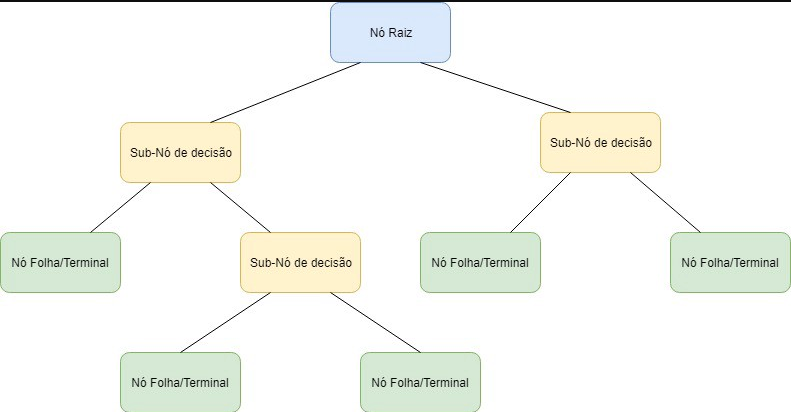

Referência: [Imagem Árvore de Decisão](https://medium.com/@gabriel.stankevix/arvore-de-decis%C3%A3o-em-r-85a449b296b2)

# Treinamento do conjunto de dados

- O Aprendizado de Máquina Supervisionado consiste em treinar o modelo com dados do conjunto de dados para que este consiga aprender e então, com esse aprendizado, classificar novas instâncias da forma mais correta possível.

- Entretanto, existem dois tipos de problemas que podem ser gerados na hora do treinamento do modelo.

- OverFiting: Quando o modelo está tão ajustado aos exemplos do conjunto de treino que quando tenta classificar instâncias do conjunto de testes acaba classificando errado

- UnderFiting: Isto ocorre quando o modelo não é capaz de encontrar meios para relacionar as variáveis, e dessa forma o treinamento não ocorre. Caso isto aconteça, ou o conjunto de dados não é informativo ou o modelo foi projetado de forma incorreta

- Dessa forma, é importante particionar os dados em treinamento e teste, para que o modelo possa ser construído de forma que este consiga classificar corretamente as novas instâncias.

- A técnica empregada para testagem foi a **Cross-Validation**

## Cross-Validation

- O Cross-Validation é uma técnica utilizada para realizar o treinamento do modelo, e testar se este treinamento gerou um modelo que prediz corretamente as instâncias.

- Este processo consiste em dividir o conjunto de dados em dois subconjuntos: **treinamento** e **teste**, como é feito na maioria das técnicas de testagem. Entretanto, esta técnica particiona os dados de treinamento em  k *folds*, este valor representa que k-1 *folds* serão usados para treinamento e 1 *fold* será usado para testagem
-Este processo se repete k vezes, em cada iteração 1 *fold* diferente é utilizado para testagem. Com a realização desta técnica é possível obter k métricas diferentes do modelo construído. 

- Ao final, o conjunto de testes inicial é utilizado para validar o modelo que já foi apurado.

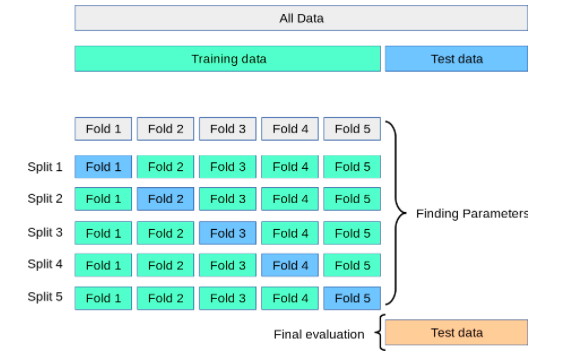

Referência: [Imagem Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

## Grid Search

- No algoritmo utilizado, o valor de k é um **hiperparâmetro** do algoritmo

- Dessa forma, é necessário definir este valor de forma cuidadosa, para que o não haja erro no funcionamento do algoritmo.

- Uma maneira de realizar isto, para problemas de pequena escala, é realizar uma busca exaustiva, para encontrar o melhor hiperparâmetro.

- Abaixo, esta busca é realizada, entretanto, além de se comparar diversos valores de k, também é levado em conta 4  distâncias diferentes:
  - Euclidiana
  - Manhattan
  - Chebyshev
  - Minkowski

### Buscandos os hiperparâmetros do KNN

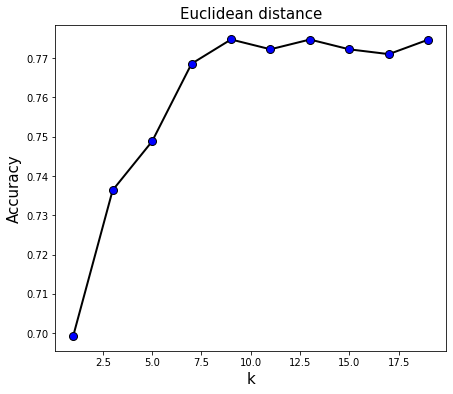

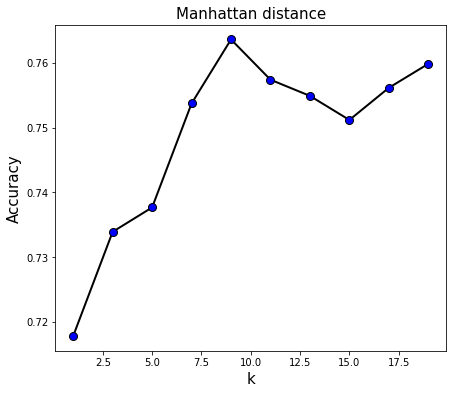

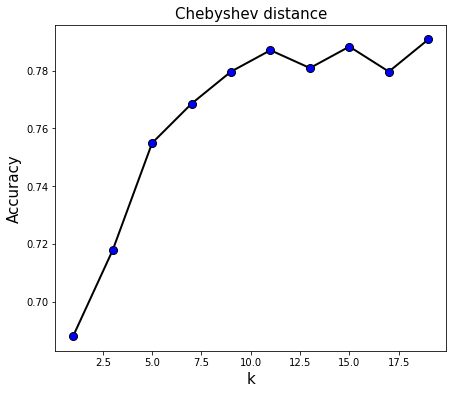

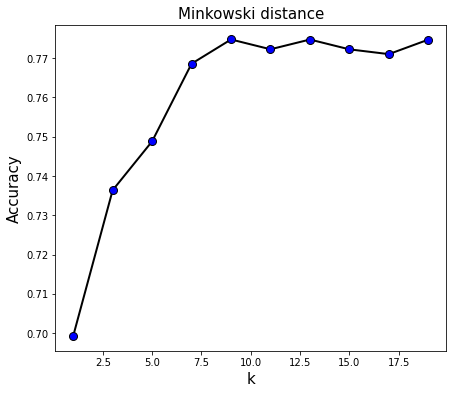

In [86]:
n_folds = 10
distancias = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
for dist in distancias:
  valores_k = []
  v_score = []
  for k in range(1, 20,2):
      model = KNeighborsClassifier(n_neighbors=k, metric = dist)
      cv = cross_validate(model, ap_normalized, y, cv=n_folds)
      v_score.append(cv['test_score'].mean())
      valores_k.append(k)

  plot_graph(valores_k,v_score,'k','Accuracy', dist.capitalize() + ' distance')

### Buscando os hiperparâmetros das árvores de decisão

In [87]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

In [88]:
dec_tree = DecisionTreeClassifier()


criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
min_samples_leaf = [2,4,6,8,10,12,14,16,18,20,22]

parameters = dict(criterion=criterion,
                      max_depth=max_depth,
                      min_samples_leaf = min_samples_leaf)

clf_GS = GridSearchCV(dec_tree, parameters, cv=10)

clf_GS.fit(atributos_preditivos_dt, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20, 22]})

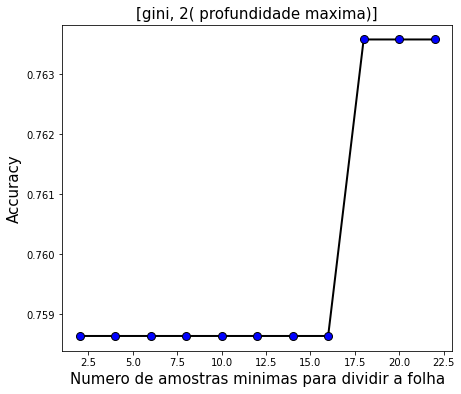

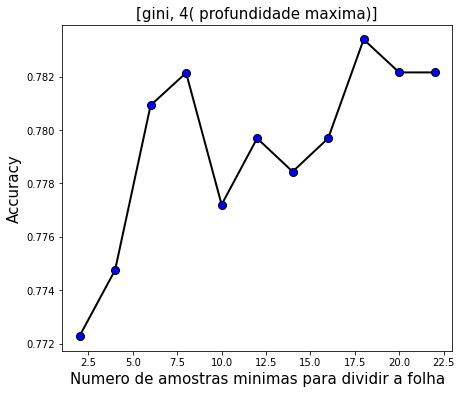

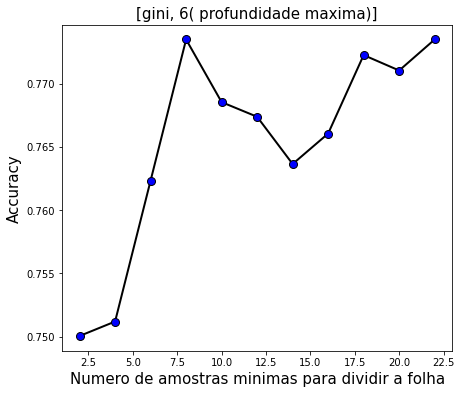

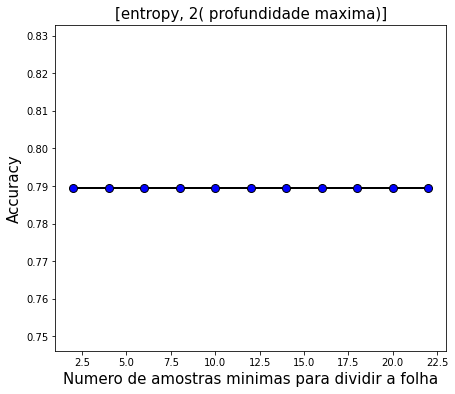

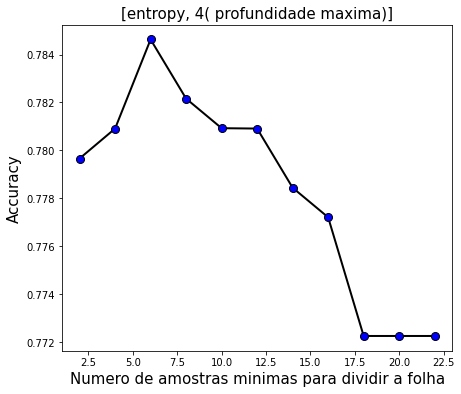

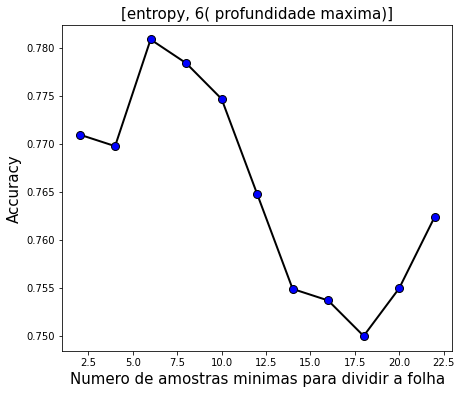

In [89]:
n_folds = 10

for l in range(0,2):
  criterion = ['gini', 'entropy']
  testes_profundidade = [2,4,6]
  for j in range(0,3):
    v_score_dt = []
    min_samples_leaf = [2,4,6,8,10,12,14,16,18,20,22]
    for i in range(0, len(min_samples_leaf)):
      #Treinando
      dec_tree = DecisionTreeClassifier(criterion=criterion[l],max_depth=testes_profundidade[j],min_samples_leaf=min_samples_leaf[i])
      cv = cross_validate(dec_tree, atributos_preditivos_dt, y, cv=n_folds)

      v_score_dt.append(cv['test_score'].mean())

    eixo_x = 'Numero de amostras minimas para dividir a folha'
    eixo_y = 'Accuracy'
    nome = '[' + criterion[l] + ', ' + str(testes_profundidade[j]) + '( profundidade maxima)]'
  
    plot_graph(min_samples_leaf,v_score_dt,eixo_x,eixo_y, nome)

In [90]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print(); print(clf_GS.best_estimator_.get_params())

Best Criterion: entropy
Best max_depth: 2
Best min_samples_leaf: 2

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


# Treinamento modelo final

## Treinamento final KNN

In [91]:
k = 9
distancia = 'euclidean'

In [92]:
X_train, X_test_knn, y_train, y_test_knn = train_test_split(ap_normalized, y, 
                                                    test_size=0.2, 
                                                    random_state=40)

In [93]:
model = KNeighborsClassifier(n_neighbors=k, metric = distancia)
model.fit(X_train,y_train)
y_pred_knn = model.predict(X_test_knn)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
acuracia_teste_knn = accuracy_score(y_test_knn,y_pred_knn)*100
print(f"A acuracia do teste realizado com k = {k} e a distancia {distancia} foi: {acuracia_teste_knn:.2f}%\n")

A acuracia do teste realizado com k = 9 e a distancia euclidean foi: 81.48%



## Treinamento final árvore de decisão

In [96]:
criterio = 'gini'
profundidade_maxima = 4
nro_amostras_folha = 3

In [97]:
from sklearn import tree

In [98]:
X_train, X_test, y_train, y_test = train_test_split(atributos_preditivos_dt, y, 
                                                    test_size=0.20, 
                                                    random_state=40)

In [99]:
dec_tree = tree.DecisionTreeClassifier(criterion=criterio,max_depth=profundidade_maxima,min_samples_leaf=nro_amostras_folha)
dec_tree.fit(X_train,y_train)
y_pred_dt = dec_tree.predict(X_test)

In [100]:
acuracia_teste_dt = accuracy_score(y_test,y_pred_dt)*100
print(f"A acuracia do teste realizado com o criterio = {criterio}, a profundidade maxima de {profundidade_maxima} e o nro minimo de amostras para separar um folha de {nro_amostras_folha} foi: {acuracia_teste_dt:.2f}%\n")

A acuracia do teste realizado com o criterio = gini, a profundidade maxima de 4 e o nro minimo de amostras para separar um folha de 3 foi: 82.10%



## Exibição da árvore de decisão

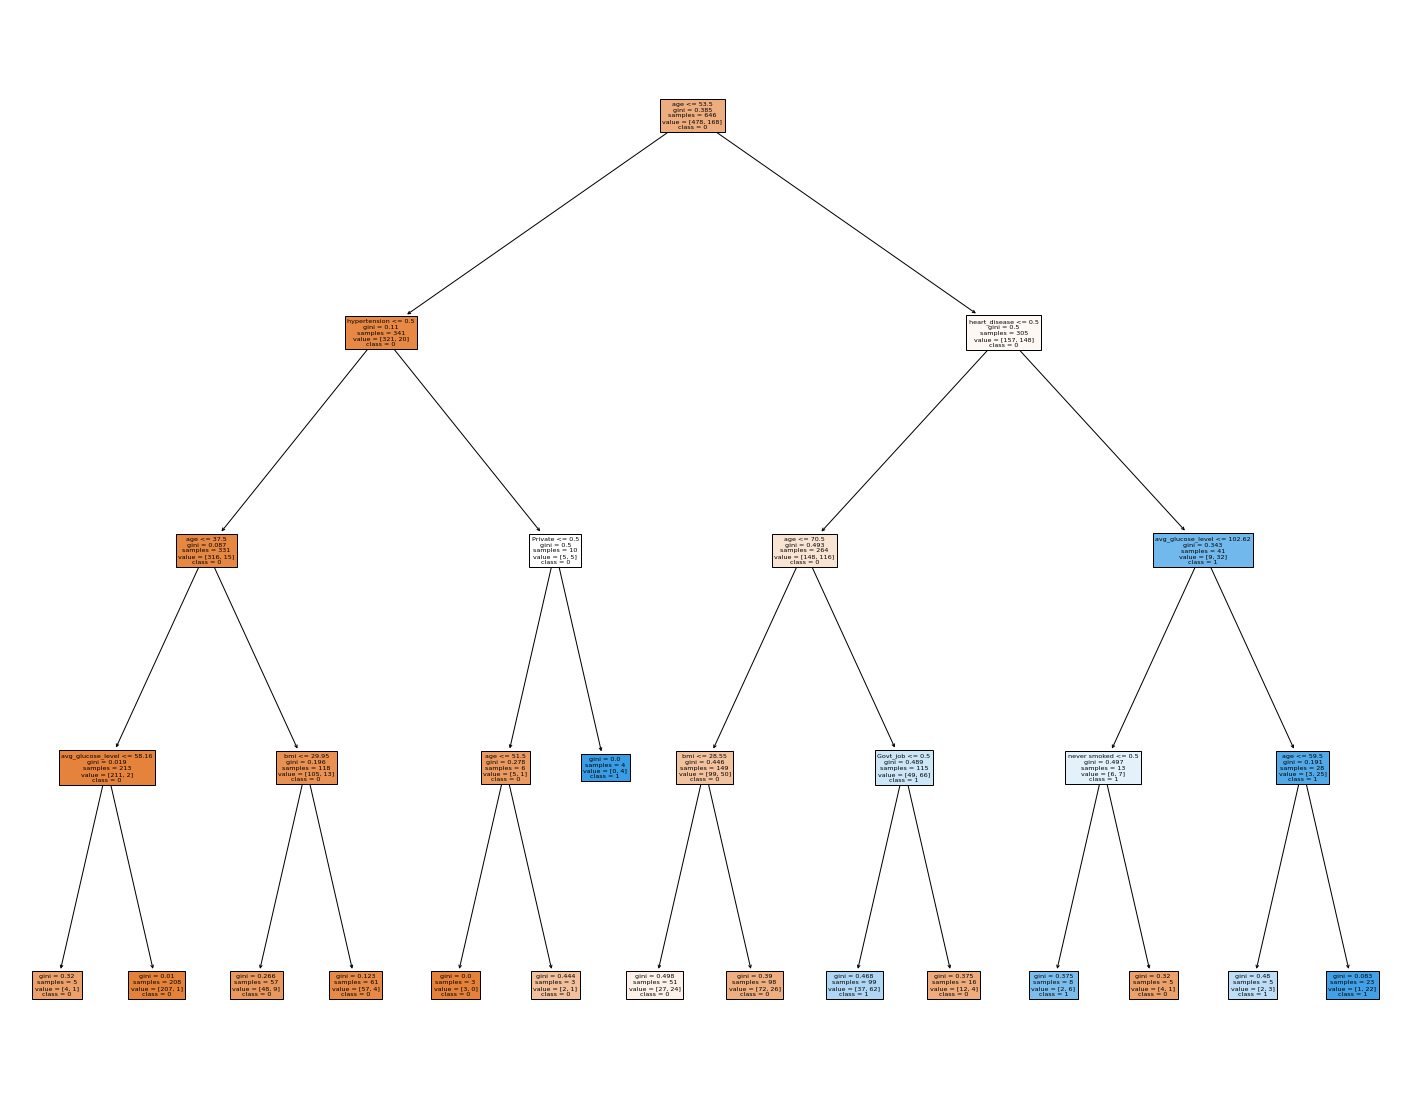

In [101]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dec_tree, 
                   feature_names=list(df.columns[:-1]),  
                   class_names=['0','1'],
                   filled=True)

# Matriz de confusão

- Para realizar a avaliação do modelo, decidimos utilizar a **matriz de confusão**
- A **matriz de confusão** consiste numa tabela que mostra as frequências de classificação para cada classe do modelo, conforme a imagem abaixo 

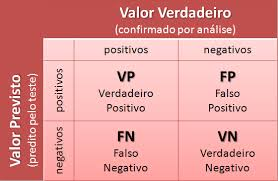

Referência: [Exemplo Matriz de Confusão](https://rstudio-pubs-static.s3.amazonaws.com/362226_37f3dfd4f7724bd9a422cc3b02d2d9f4.html)

In [102]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 14})

- Foram utilizadas as funções da biblioteca sklearn para plotar a matriz do modelo analisado.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


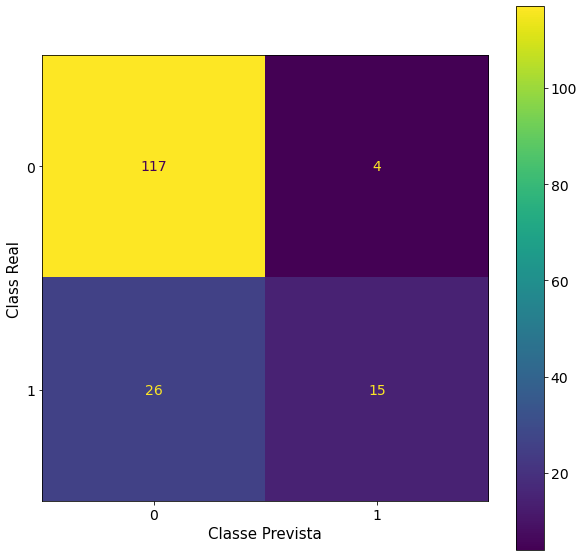

In [103]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test_knn, y_test_knn) 
plt.xlabel("Classe Prevista",fontsize=15)
plt.ylabel("Class Real",fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


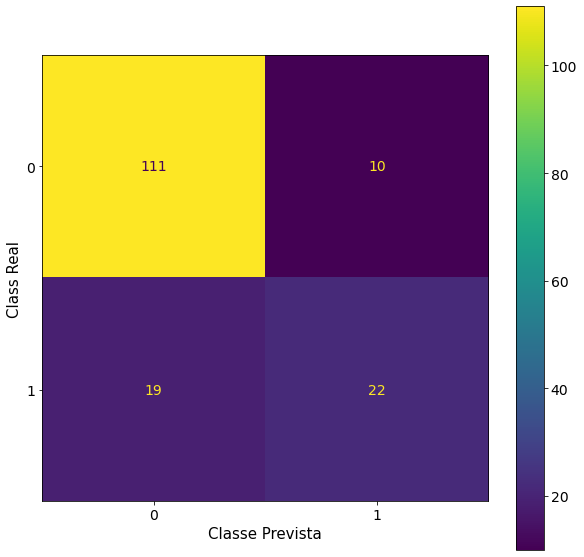

In [104]:
plot_confusion_matrix(dec_tree, X_test, y_test) 
plt.xlabel("Classe Prevista",fontsize=15)
plt.ylabel("Class Real",fontsize=15)
plt.show()

# Conclusão

- Ao fim da análise, encontrou-se dois valores de acurácia para os modelos testados (KNN e Árvore de Decisão).
- Para o modelo do KNN, a acurácia encontrada foi de aproximadamente 77.16%.
- Para o modelo da Árvore de Decisão, a acurácia encontrada foi de aproximadamente 82.10%.
- A matriz de confusão do KNN mostrou que o modelo não se mostrou um modelo tão eficiente para lidar com este conjunto de dados.
- Já a Árvore de Decisão, se mostrou um modelo mais eficiente para lidar com o conjunto de dados selecionado, visto que alcançou melhores resultados, e previu mais resultados corretamente.
- Dessa forma, conclui-se que a Árvore de Decisão é um modelo melhor para ser utilizado neste conjunto de dados.